### *Pontificia Universidad Javeriana*
### **Materia**: Visualización de Datos
### **Dpto:** Ing Sistemas
### **Autor:** Isaac Janica

# Carga de los datos por medio de un DataFrame de Pandas

In [ ]:
import pandas as pd

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Voy a revisar que valores se encuentra en la columna season y hr
print(day_df['season'].unique())
print(hour_df['hr'].unique())

[1 2 3 4]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

season_map = {1: 'Primavera', 2: 'Verano', 3: 'Otonio', 4: 'Invierno'}
day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Primavera,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Primavera,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Primavera,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Primavera,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Primavera,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Graficos para resolver las preguntas

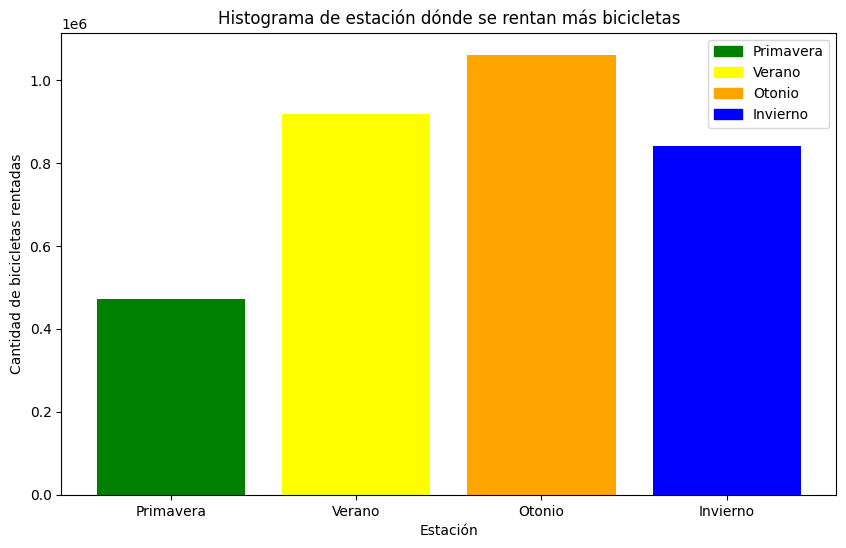

In [ ]:
plt.figure(figsize=(10,6))
season_colors = {'Primavera': 'green', 'Verano': 'yellow', 'Otonio': 'orange', 'Invierno': 'blue'}
season_counts = day_df.groupby('season')['cnt'].sum().reindex(season_map.values())

bars = plt.bar(season_counts.index, season_counts.values, color=[season_colors[season] for season in season_counts.index])


plt.title('Histograma de estación dónde se rentan más bicicletas')
plt.xlabel('Estación')
plt.ylabel('Cantidad de bicicletas rentadas')

legend_colors = [plt.Rectangle((0,0),1,1, color=season_colors[season]) for season in season_counts.index]
plt.legend(legend_colors, season_counts.index)
plt.show()

### Pregunta 1
Como se puede observar, la época en dónde se rentan mayor cantidad de bicicletas es otoño y la que menos es primavera. Por lo cuál, la época del año en dónde debo tener más bicicletas es Otoño.

# Vamos a ver las horas del día y los días en dónde hay más demanda

In [ ]:
days_map = {0: 'Lun', 1: 'Mar', 2: 'Mier', 3: 'Juev', 4: 'Vier', 5: 'Sab', 6: 'Dom' }

day_df['weekday'] = day_df['weekday'].map(days_map)
hour_df['weekday'] = hour_df['weekday'].map(days_map)
day_df.head(20)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Primavera,0,1,0,Dom,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Primavera,0,1,0,Lun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Primavera,0,1,0,Mar,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Primavera,0,1,0,Mier,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Primavera,0,1,0,Juev,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Primavera,0,1,0,Vier,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Primavera,0,1,0,Sab,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Primavera,0,1,0,Dom,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Primavera,0,1,0,Lun,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Primavera,0,1,0,Mar,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Primavera,0,1,0,0,Dom,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Primavera,0,1,1,0,Dom,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Primavera,0,1,2,0,Dom,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Primavera,0,1,3,0,Dom,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Primavera,0,1,4,0,Dom,0,1,0.24,0.2879,0.75,0.0,0,1,1


/tmp/ipykernel_4842/2907497478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_rent.index, y=weekday_rent.values, palette='viridis')


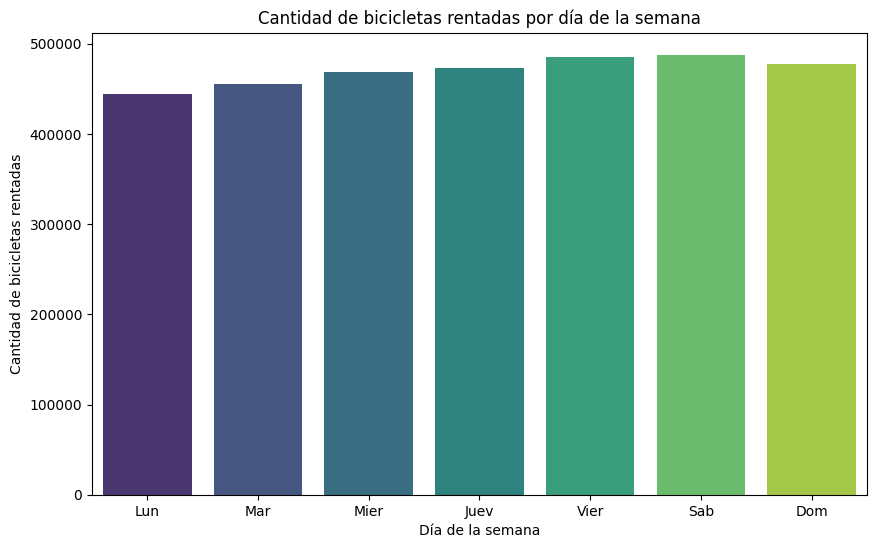

In [ ]:
weekday_rent = day_df.groupby('weekday')['cnt'].sum().reindex(days_map.values())

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_rent.index, y=weekday_rent.values, palette='viridis')
plt.title('Cantidad de bicicletas rentadas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de bicicletas rentadas')

plt.show()

### Pregunta 2.1:
Como se puede observar, los días de la semana en dónde hay mayor cantidad de renta de bicicletas son los viernes y los sábados

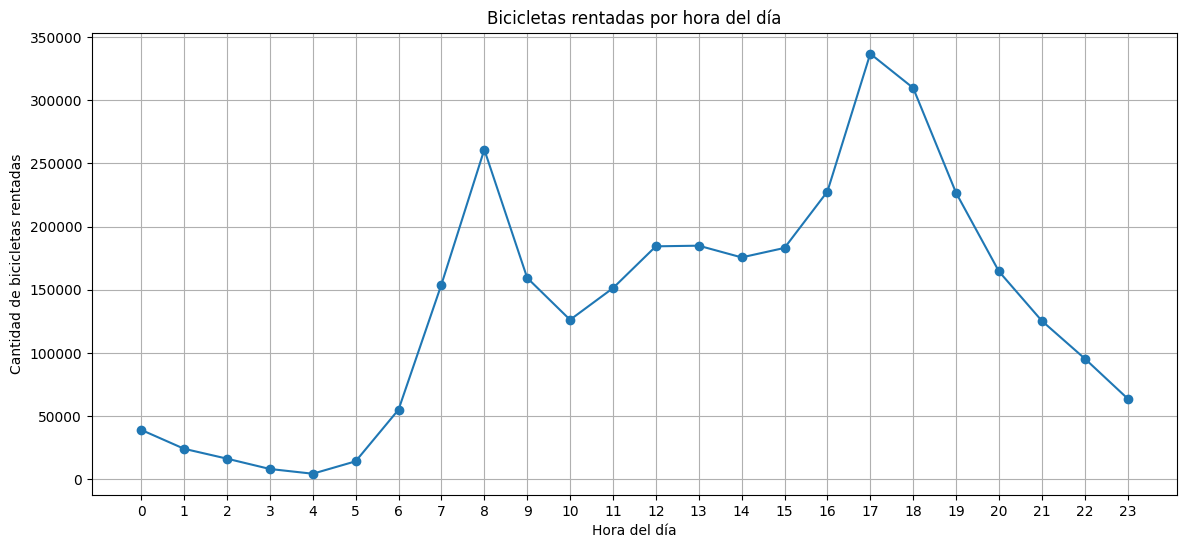

In [ ]:
hour_rent = hour_df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(14,6))
plt.plot(hour_rent.index, hour_rent.values, marker='o')

plt.title('Bicicletas rentadas por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de bicicletas rentadas')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### Pregunta 2.2:
Aqui se puede ver que las dos horas en dónde se llega a un pico en la renta de bicicletas son las 8 y las 5, de esto se podría intuir que esto ocurre también debido a que son horas pico en dónde la gente suele solicitar algún medio de transporte para ir al trabajo o casa

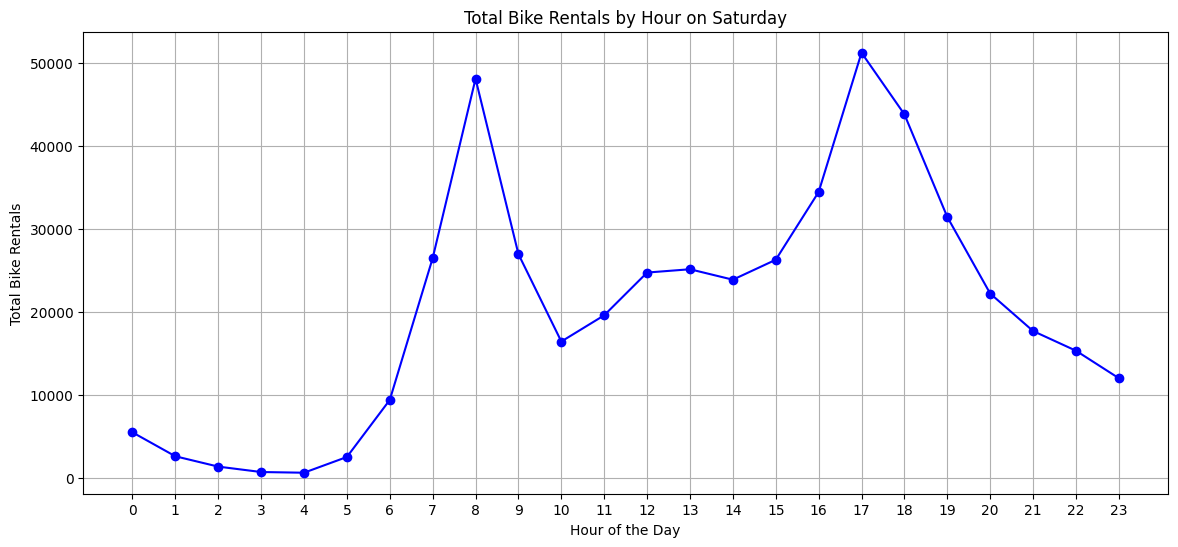

In [ ]:
sab_df = hour_df[hour_df['weekday'] == 'Sab']
rentas_sab = sab_df.groupby('hr')['cnt'].sum()
plt.figure(figsize=(14, 6))
plt.plot(rentas_sab.index, rentas_sab.values, marker='o', linestyle='-', color='b')


plt.title('Total Bike Rentals by Hour on Saturday')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.xticks(range(24))



plt.grid(True)
plt.show()

Se trató de estudiar más a fondo cual era la tendencia del día con más renta de bicicletas, el sábado. Lo que se encontró fue el hecho de que este día sigue la tendencia general de que las dos horas en dónde más se rentan bicicletas son las 8 y las 5. Sin embargo, en el caso de este día, se ve que ambos picos tienden a tener un valor mucho más similar que en el caso general en el eje *Y*.


### Pregunta 3:
De todo esto se puede **inferir** que los usuario tienden a usar las bicicletas para moverse en horas pico y que lo hacen con mayor frecuencia al finalizar la semana, es decir, los viernes y sábados. Mientras que los Lunes se reduce la cantidad de bicicletas rentadas.

In [ ]:
weather_map = {1: 'Despejado', 2: 'Nublado', 3: 'Lluvia o nieve ligera', 4: 'Lluvia o nevada' }

day_df['weathersit'] = day_df['weathersit'].map(weather_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)



/tmp/ipykernel_4842/1763446276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_rent.index, y=weather_rent.values, palette='viridis')


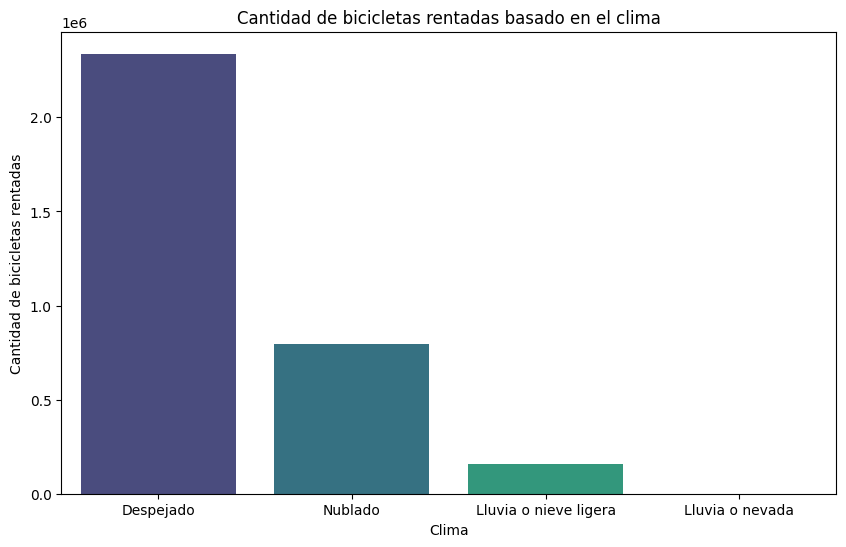

In [ ]:
weather_rent = hour_df.groupby('weathersit')['cnt'].sum().reindex(weather_map.values())

plt.figure(figsize=(10,6))
sns.barplot(x=weather_rent.index, y=weather_rent.values, palette='viridis')
plt.title('Cantidad de bicicletas rentadas basado en el clima')
plt.xlabel('Clima')
plt.ylabel('Cantidad de bicicletas rentadas')

plt.show()

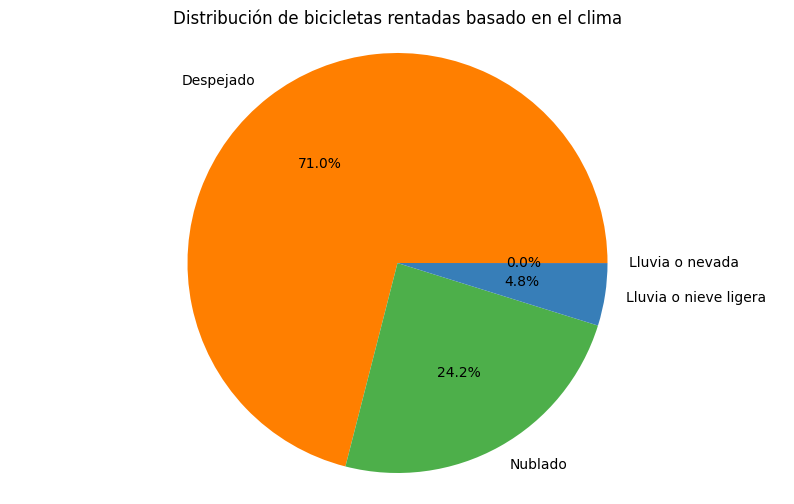

In [ ]:


plt.figure(figsize=(10, 6))
colors = ['#ff7f00','#4daf4a', '#377eb8',  '#e41a1c']
plt.pie(weather_rent.values, labels=weather_rent.index, autopct='%1.1f%%', colors=colors)


plt.title('Distribución de bicicletas rentadas basado en el clima')


plt.axis('equal')
plt.show()

### Pregunta 4:
Como se puede observar las condiciones climáticas afectan de manera definitiva la renta o no de bicicletas. Es tan fuerte la tendencia la cantidad de bicicletas rentadas en un día nublado a comparación de un día despejado es casi tres veces el tamaño de bicicletas rentadas en el día nublado.

### Pregunta 5:
En qué día de la semana tengo más clientes casuales para poder saber en qué días debería hacer ofertas especiales para poder dar a conocer más mi servicio.


/tmp/ipykernel_4842/2704036076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_rent.index, y=weekday_rent.values, palette='viridis')


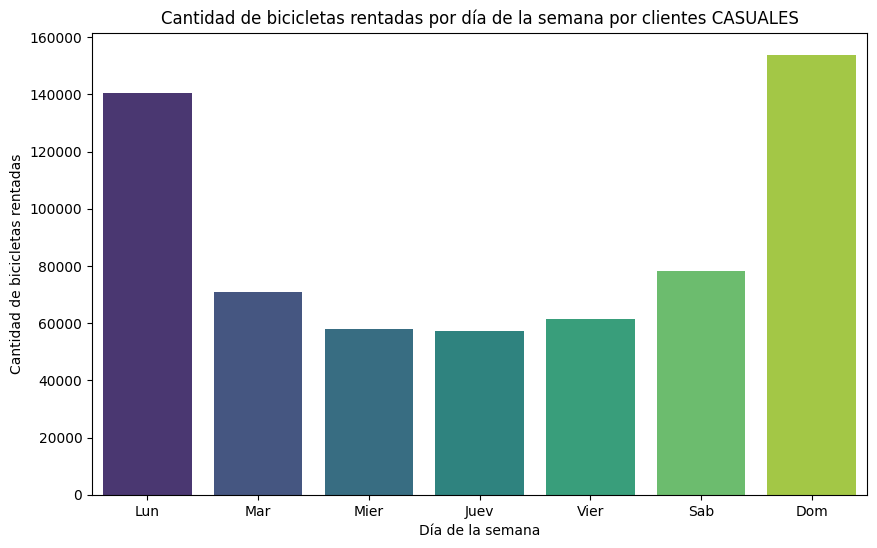

In [ ]:
weekday_rent = day_df.groupby('weekday')['casual'].sum().reindex(days_map.values())

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_rent.index, y=weekday_rent.values, palette='viridis')
plt.title('Cantidad de bicicletas rentadas por día de la semana por clientes CASUALES')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de bicicletas rentadas')

plt.show()

Como se puede observar la tendencia de clientes casuales tiende a ser bastante más diferentes del total. En este sentido los días en dónde se deberían sacar descuentos para clientes nuevos sería los Lunes y Domingos para poder atraer una mayor cantidad de estos. Sin embargo, si se quisiera fidelizar clientes tocaría tener una estrategia diferente.
